## Global Averaging
 jhoij

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns

%pylab inline

matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]

Populating the interactive namespace from numpy and matplotlib


<div class="alert alert-warning">
<h3> Below, we look more closely at issues that may arise when averaging grid cells on a spherical surface.</h3>
</div>

In [14]:
### Initialize arrays (historical)
years = np.arange(1850,2005+1,1)
months = np.arange(1,13,1)

ensembles = np.empty((5,len(years),12,27,288,))

In [15]:
### Read in data
### See documentation for more details on inputs
from readCMIP5 import readCMIP5Data 

# Call directory where you stored your data
directory = './data/SurfaceAirTemperature_tas/'

# Store the data in one 5d array
for i in xrange(len(ensembles)):
    lat,lon,ensembles[i,:,:,:,:] = readCMIP5Data(directory,'gridded',
                                                 'historical','%s' % (i+1),'tas')

print ensembles.shape, '---> [number of ensembles,years,months,lat,lon]'

(5, 156, 12, 27, 288) ---> [number of ensembles,years,months,lat,lon]


In [16]:
### Read in utility data
### See documentation for more details on inputs
from readCMIP5 import readUtilityData

# Call directory where you stored your data
directory = './data/'

area = lat,lon,area = readUtilityData(directory,'gridded','areacella')
print area.shape, '---> [lat,lon]'

(27, 288) ---> [lat,lon]


In [17]:
### Convert to Celsius
ensembles = ensembles - 273.15 #kelvin to celsius 

In [18]:
### Import function for calculating yearly averages over grid cells
### See documentation for more details on inputs
from calc_gridMean import calcYearMean

In [19]:
### Calculate averages without weighting area of grid

# Average temperature for each ensemble for all 156 years
yrmean = np.apply_over_axes(np.nanmean,ensembles,(2,3,4))
yrmean = np.squeeze(yrmean)

# Average temperature for each ensemble over time
totalmean = np.apply_over_axes(np.nanmean,ensembles,(1,2))
totalmean = np.squeeze(totalmean)

print yrmean.shape, '    ---> [ensemble,year]'
print totalmean.shape, '---> [ensemble,lat,lon]'

(5, 156)     ---> [ensemble,year]
(5, 27, 288) ---> [ensemble,lat,lon]


In [20]:
### Calculate averaging considering size of grid cell
newtemp = np.empty((5,years.shape[0]))
for i in xrange(yrmean.shape[0]):
    newtemp[i,:] = calcYearMean(ensembles[i,:,:,:],area)

print newtemp.shape, '---> [ensemble,year]'

(5, 156) ---> [ensemble,year]


In [21]:
### Calculate difference in averaging 
differ = newtemp - yrmean

print differ.shape, '---> [ensemble,year]'

(5, 156) ---> [ensemble,year]


In [22]:
### Calculate average over all of the ensembles (ensemble mean)
average_yrmean = np.nanmean(yrmean,axis=0)
average_newtemp = np.nanmean(newtemp,axis=0)
average_differ = np.nanmean(differ,axis=0)

In [23]:
### Let's create a quick function for plotting uniform-looking subplots
def subplot(style):
    sns.set_palette('hls')
    if style == 'climatology':
        plt.ylim([-19,-10])
        plt.legend(loc='upper left',fontsize=14)
    elif style == 'difference':
        plt.ylim([0,3])
        plt.legend(loc='lower center',fontsize=14)
    plt.xticks(np.arange(0,161,20),map(str,np.arange(1850,2025,20)))
    return 

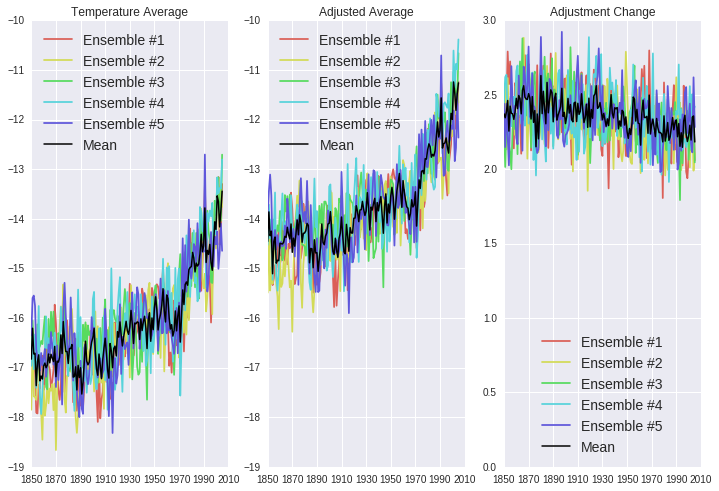

In [24]:
### Plot figure
fig = plt.figure()

# subplot 1 for temperatures without weighting grid
ax1 = fig.add_subplot(131)
for i in xrange(yrmean.shape[0]):
    plt.plot(yrmean[i],label='Ensemble #%s' % (i+1))
plt.plot(average_yrmean,color='k',linewidth=1.5,label='Mean')
subplot('climatology')
plt.title('Temperature Average')

# subplot 2 for temperatures with consideration for sphere
ax2 = fig.add_subplot(132)
for i in xrange(yrmean.shape[0]):
    plt.plot(newtemp[i],label='Ensemble #%s' % (i+1))
plt.plot(average_newtemp,color='k',linewidth=1.5,label='Mean')
subplot('climatology')
plt.title('Adjusted Average')

# subplot 3 showing difference between subplots 1 and 2
ax3 = fig.add_subplot(133)
for i in xrange(yrmean.shape[0]):
    plt.plot(differ[i],label='Ensemble #%s' % (i+1))
plt.plot(average_differ,color='k',linewidth=1.5,label='Mean')
subplot('difference')
plt.title('Adjustment Change')

plt.show()

<div class="alert alert-warning">
<h3>We see that by considering the size of the grid cells, temperatures increase... grid cells at lower latitudes (warmer temperatures) are larger and therefore, are weighted more heavily than those close to the poles.</h3>
</div>